# House Prices: Advanced Regression Techniques
-----

Predict sales prices and practice feature engineering, RFs, and gradient boosting

### File descriptions
- **train.csv** - the training set
- **test.csv** - the test set
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields
Here's a brief version of what you'll find in the data description file.

- **SalePrice**:the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**:The building class
- **MSZoning**:The general zoning classification
- **LotFrontage**:Linear feet of street connected to property
- **LotArea**:Lot size in square feet
- **Street**:Type of road access
- **Alley**:Type of alley access
- **LotShape**:General shape of property
- **LandContour**:Flatness of the property
- **Utilities**:Type of utilities available
- **LotConfig**:Lot configuration
- **LandSlope**:Slope of property
- **Neighborhood**:Physical locations within Ames city limits
- **Condition1**:Proximity to main road or railroad
- **Condition2**:Proximity to main road or railroad (if a second is present)
- **BldgType**:Type of dwelling
- **HouseStyle**:Style of dwelling
- **OverallQual**:Overall material and finish quality
- **OverallCond**:Overall condition rating
- **YearBuilt**:Original construction date
- **YearRemodAdd**:Remodel date
- **RoofStyle**:Type of roof
- **RoofMatl**:Roof material
- **Exterior1st**:Exterior covering on house
- **Exterior2nd**:Exterior covering on house (if more than one material)
- **MasVnrType**:Masonry veneer type
- **MasVnrArea**:Masonry veneer area in square feet
- **ExterQual**:Exterior material quality
- **ExterCond**:Present condition of the material on the exterior
- **Foundation**:Type of foundation
- **BsmtQual**:Height of the basement
- **BsmtCond**:General condition of the basement
- **BsmtExposure**:Walkout or garden level basement walls
- **BsmtFinType1**:Quality of basement finished area
- **BsmtFinSF1**:Type 1 finished square feet
- **BsmtFinType2**:Quality of second finished area (if present)
- **BsmtFinSF2**:Type 2 finished square feet
- **BsmtUnfSF**:Unfinished square feet of basement area
- **TotalBsmtSF**:Total square feet of basement area
- **Heating**:Type of heating
- **HeatingQC**:Heating quality and condition
- **CentralAir**:Central air conditioning
- **Electrical**:Electrical system
- **1stFlrSF**:First Floor square feet
- **2ndFlrSF**:Second floor square feet
- **LowQualFinSF**:Low quality finished square feet (all floors)
- **GrLivArea**:Above grade (ground) living area square feet
- **BsmtFullBath**:Basement full bathrooms
- **BsmtHalfBath**:Basement half bathrooms
- **FullBath**:Full bathrooms above grade
- **HalfBath**:Half baths above grade
- **Bedroom**:Number of bedrooms above basement level
- **Kitchen**:Number of kitchens
- **KitchenQual**:Kitchen quality
- **TotRmsAbvGrd**:Total rooms above grade (does not include bathrooms)
- **Functional**:Home functionality rating
- **Fireplaces**:Number of fireplaces
- **FireplaceQu**:Fireplace quality
- **GarageType**:Garage location
- **GarageYrBlt**:Year garage was built
- **GarageFinish**:Interior finish of the garage
- **GarageCars**:Size of garage in car capacity
- **GarageArea**:Size of garage in square feet
- **GarageQual**:Garage quality
- **GarageCond**:Garage condition
- **PavedDrive**:Paved driveway
- **WoodDeckSF**:Wood deck area in square feet
- **OpenPorchSF**:Open porch area in square feet
- **EnclosedPorch**:Enclosed porch area in square feet
- **3SsnPorch**:Three season porch area in square feet
- **ScreenPorch**:Screen porch area in square feet
- **PoolArea**:Pool area in square feet
- **PoolQC**:Pool quality
- **Fence**:Fence quality
- **MiscFeature**:Miscellaneous feature not covered in other categories
- **MiscVal**:$Value of miscellaneous feature
- **MoSold**:Month Sold
- **YrSold**:Year Sold
- **SaleType**:Type of sale
- **SaleCondition**:Condition of sale

## Look at the Big Picture

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

#### Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Get the Data

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


housing_df = pd.read_csv(os.path.join("dataset", "train.csv"))
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


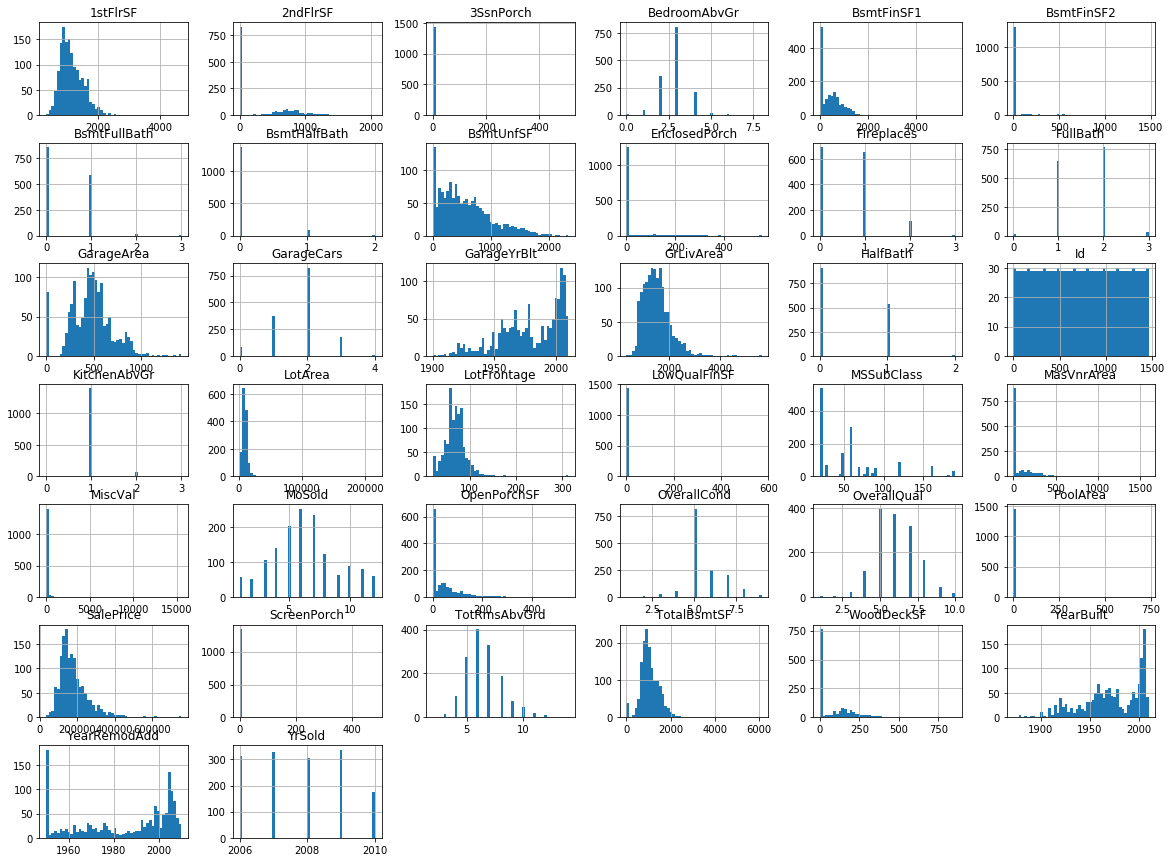

In [4]:
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
corr_housing = housing_df.corr()
corr_housing["SalePrice"]
# looking for string linear correlations

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

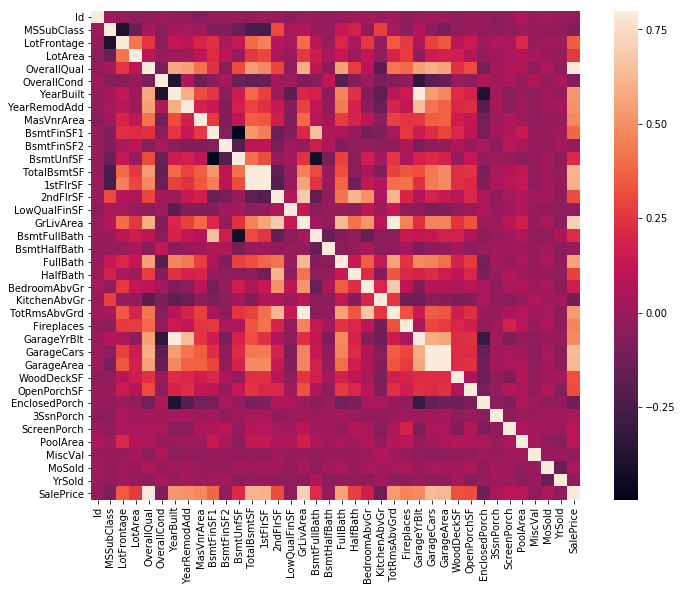

In [20]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_housing, vmax=.8, square=True)

[]

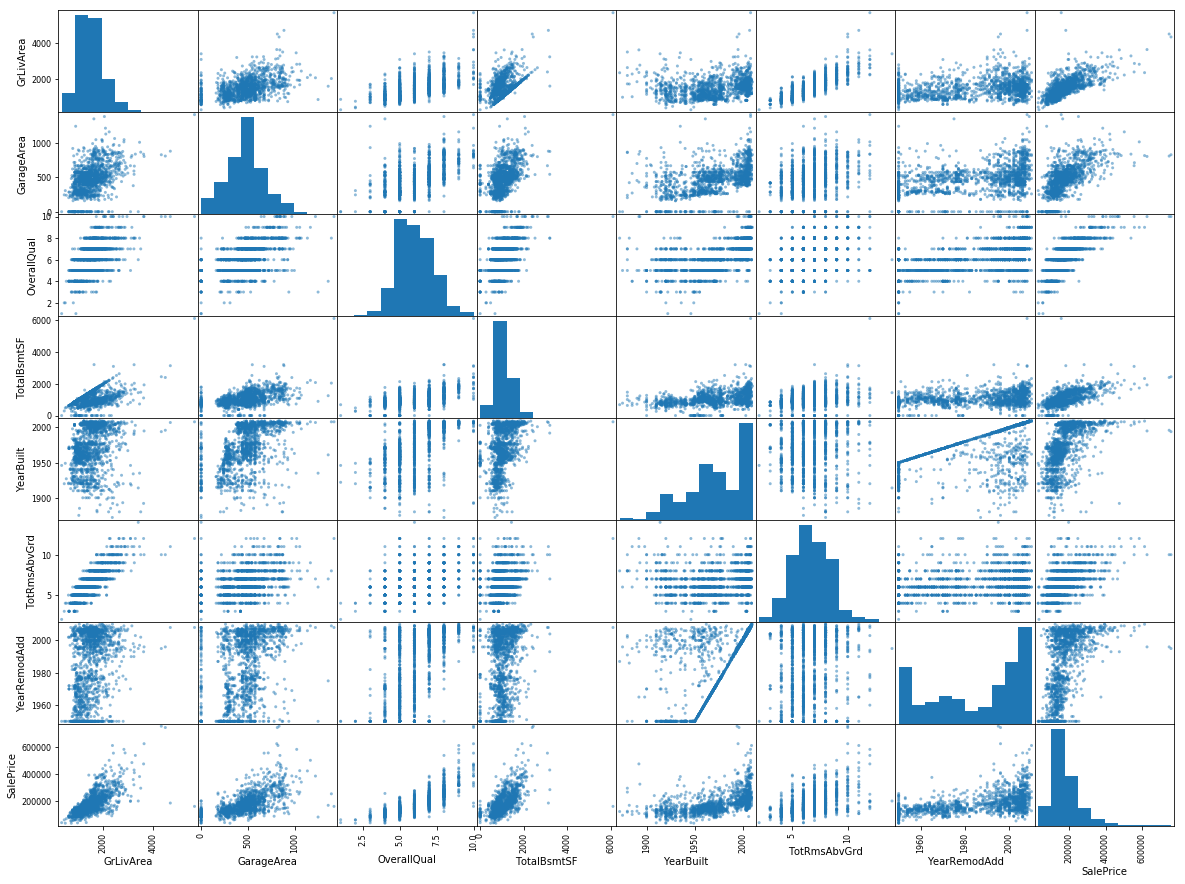

In [21]:
# should look for some relations between some of the fields
# some feilds are more important in the housing industry

important_fields = ["GrLivArea", "GarageArea", "OverallQual", "TotalBsmtSF", "YearBuilt", "TotRmsAbvGrd", "YearRemodAdd", "SalePrice"]

from pandas.plotting import scatter_matrix
scatter_matrix(housing_df[important_fields], figsize=(20,15))
plt.plot()

In [24]:
# since these fields seem to have strong linear correlations we will use them in our models
# we might engineer a new field using them, but for now lets look at these
housing_df[important_fields].describe()
# none of them are missing values, so we don't need to fill anything, but we will do feature scaling

,GrLivArea,GarageArea,OverallQual,TotalBsmtSF,YearBuilt,TotRmsAbvGrd,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,472.980137,6.099315,1057.429452,1971.267808,6.517808,1984.865753,180921.195890
std,525.480383,213.804841,1.382997,438.705324,30.202904,1.625393,20.645407,79442.502883
min,334.000000,0.000000,1.000000,0.000000,1872.000000,2.000000,1950.000000,34900.000000
25%,1129.500000,334.500000,5.000000,795.750000,1954.000000,5.000000,1967.000000,129975.000000
50%,1464.000000,480.000000,6.000000,991.500000,1973.000000,6.000000,1994.000000,163000.000000
75%,1776.750000,576.000000,7.000000,1298.250000,2000.000000,7.000000,2004.000000,214000.000000
max,5642.000000,1418.000000,10.000000,6110.000000,2010.000000,14.000000,2010.000000,755000.000000


## Prepare the Data for ML Algorithms

In [42]:
from sklearn.model_selection import train_test_split
X, y = housing_df[["GrLivArea", "GarageArea", "OverallQual", "TotalBsmtSF", "YearBuilt", "TotRmsAbvGrd", "YearRemodAdd"]], housing_df["SalePrice"]

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

prep_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

X_prep = prep_pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.3)

## Select and Train Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

lr_rmse_scores = np.sqrt(-lr_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lr_rmse_scores)

Scores: [42742.41736852 30671.92093036 46588.90522941 44749.66554651
 28486.70107976 44154.28606321 36751.4380111  68372.38682711
 36035.98896837 34211.66889074]
Mean: 41276.53789150738
Standard deviation: 10764.707203020704


In [45]:
# lets try different models
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

sgd_r = SGDRegressor()

param_grid_sgd = [
    {"loss": ["squared_loss", "huber"], "penalty" : ["l2"], "alpha": [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]},
    {"loss": ["squared_loss", "huber"], "penalty" : ["l1"], "alpha": [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]},
]

grid_search_sgd = GridSearchCV(sgd_r, param_grid_sgd, cv=10, scoring="neg_mean_squared_error", n_jobs=4)
grid_search_sgd.fit(X_train, y_train)

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'loss': ['squared_loss', 'huber'], 'penalty': ['l2'], 'alpha': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}, {'loss': ['squared_loss', 'huber'], 'penalty': ['l1'], 'alpha': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [47]:
grid_search_sgd.best_estimator_

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [48]:
grid_search_sgd.best_params_

{'alpha': 0.1, 'loss': 'squared_loss', 'penalty': 'l2'}

In [53]:
np.sqrt(-grid_search_sgd.best_score_)

42085.91954217794

In [64]:
# another model
from sklearn.svm import SVR

svm_r = SVR()

param_grid_svm = [
    {"kernel": ["rbf"], "C": [0.1, 0.3, 1, 3, 10, 30, 100]},
    {"kernel": ["poly"], "degree": [1,2,3,4,5], "C": [0.1, 0.3, 1, 3, 10, 30, 100]},
    {"kernel": ["linear"], "C": [100, 300, 500, 600]},
    {"kernel": ["sigmoid"], "C": [0.1, 0.3, 1, 3, 10, 30, 100]},
]

grid_search_svm = GridSearchCV(svm_r, param_grid_svm, cv=10, scoring="neg_mean_squared_error", n_jobs=4)
grid_search_svm.fit(X_train, y_train)

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['rbf'], 'C': [0.1, 0.3, 1, 3, 10, 30, 100]}, {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5], 'C': [0.1, 0.3, 1, 3, 10, 30, 100]}, {'kernel': ['linear'], 'C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 500, 600]}, {'kernel': ['sigmoid'], 'C': [0.1, 0.3, 1, 3, 10, 30, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [66]:
grid_search_svm.best_params_

{'C': 500, 'kernel': 'linear'}

In [67]:
np.sqrt(-grid_search_svm.best_score_)

42178.36237840365

In [74]:
# lets try a random forest
from sklearn.ensemble import RandomForestRegressor

rf_r = RandomForestRegressor()

param_grid_rf = [
    {"n_estimators": [5, 10, 50, 100, 500], "max_depth": [3,5, 10, 100, 500, 1000], "bootstrap": [True]},
    {"n_estimators": [5, 10, 50, 100, 500], "max_depth": [3,5, 10, 100, 500], "bootstrap": [False]},
    {"n_estimators": [5, 10, 50, 100, 500], "max_depth": [3,5, 10, 100, 500], "bootstrap": [False]},
]

grid_search_rf = GridSearchCV(rf_r, param_grid_rf, cv=10, scoring="neg_mean_squared_error", n_jobs=4)
grid_search_rf.fit(X_train, y_train)

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'n_estimators': [5, 10, 50, 100, 500], 'max_depth': [3, 5, 10, 100, 500, 1000], 'bootstrap': [True]}, {'n_estimators': [5, 10, 50, 100, 500], 'max_depth': [3, 5, 10, 100, 500], 'bootstrap': [False]}, {'n_estimators': [5, 10, 50, 100, 500], 'max_depth': [3, 5, 10, 100, 500], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [75]:
grid_search_rf.best_params_

{'bootstrap': True, 'max_depth': 1000, 'n_estimators': 500}

In [76]:
np.sqrt(-grid_search_rf.best_score_)

33770.85002591063

In [94]:
from sklearn.metrics import mean_squared_log_error
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mean_squared_log_error(y_test, y_pred_lr)

0.03605445311137244

In [79]:
sgd_r = SGDRegressor(alpha=0.1, loss="squared_loss", penalty='l2')
sgd_r.fit(X_train, y_train)
y_pred_sdg = sgd_r.predict(X_test)
mean_squared_log_error(y_test, y_pred_sdg)

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.050133970293431196

In [80]:
svr_r = SVR(C=500, kernel='linear')
svr_r.fit(X_train, y_train)
y_pred_svr = svr_r.predict(X_test)
mean_squared_log_error(y_test, y_pred_svr)

0.028758376020243944

In [82]:
rf_r = RandomForestRegressor(bootstrap=True, max_depth=1000, n_estimators=500)
rf_r.fit(X_train, y_train)
y_pred_rf = rf_r.predict(X_test)
mean_squared_log_error(y_test, y_pred_rf)

0.028752048678357216

In [31]:
housing_test = pd.read_csv(os.path.join("dataset", "test.csv"))

In [2]:
#testing
testing = housing_test[["GrLivArea", "GarageArea", "OverallQual", "TotalBsmtSF", "YearBuilt", "TotRmsAbvGrd", "YearRemodAdd"]]
testing_prep = prep_pipeline.transform(testing)

NameError: name 'prep_pipeline' is not defined

In [90]:
testing_results = rf_r.predict(testing_prep)

In [91]:
testing_df = pd.DataFrame({
    "Id": housing_test['Id'],
    "SalePrice": testing_results
})
testing_df.head()

,Id,SalePrice
0,1461,126931.232
1,1462,141415.464
2,1463,170395.074
3,1464,181003.000
4,1465,221602.928


In [92]:
testing_df.to_csv('submission.csv', index=False)
# kaggel score 0.16783, not so great, maybe we need to remove outliers or use more the features

In [32]:
train_ID = housing_df['Id']
test_ID = housing_test['Id']

housing_df.drop("Id", axis = 1, inplace = True)
housing_test.drop("Id", axis = 1, inplace = True)

housing_df = housing_df.drop(housing_df[(housing_df['GrLivArea']>4000) & (housing_df['SalePrice']<300000)].index)

In [33]:
# log target value
housing_df['SalePrice'] = np.log1p(housing_df['SalePrice'])
y_train = housing_df.SalePrice.values

In [34]:
ntrain = housing_df.shape[0]
ntest = housing_test.shape[0]
y_train = housing_df.SalePrice.values
all_data = pd.concat((housing_df, housing_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.head()

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [35]:
# missing data 
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [36]:
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(all_data["LotFrontage"].median())

In [37]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [38]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [39]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


In [41]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [42]:
from scipy.stats import norm, skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)


Skew in numerical features: 

There are 59 skewed numerical features to Box Cox transform


In [43]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 222)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
train = all_data[:ntrain]
test = all_data[ntrain:]

X_train, X_test, y_train_ss, y_test_ss = train_test_split(train, y_train, test_size=0.3)

rf_r = RandomForestRegressor(bootstrap=True, max_depth=1000, n_estimators=500)
rf_r.fit(X_train, y_train_ss)
y_pred_rf = rf_r.predict(X_test)
mean_squared_log_error(y_test_ss, y_pred_rf)

0.00010583782934118015

In [46]:
testing_results = rf_r.predict(test)

In [49]:
testing_df = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": np.expm1(testing_results)
})
testing_df.head()

,Id,SalePrice
0,1461,118396.592609
1,1462,155424.461751
2,1463,177017.043823
3,1464,182597.476065
4,1465,207737.367573


In [51]:
testing_df.to_csv('submission.csv', index=False)
# kaggel score 0.14608, much better but we can go do better

In [52]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [55]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [56]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [58]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [60]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [61]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1115 (0.0074)



In [62]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1151 (0.0076)



In [63]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1161 (0.0091)



In [65]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [67]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1086 (0.0077)



In [69]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [72]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1083 (0.0073)


In [70]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [73]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07888010410661551


In [74]:
ensemble = stacked_pred;
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission_1.csv',index=False)
# kaggel score 0.11570, final